<a href="https://colab.research.google.com/github/nishinomiya/tf2.0-mnist/blob/master/mninst_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0
import tensorflow as tf

     |████████████████████████████████| 86.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 38.6MB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import os

# Tensorflow 2.0 Eager execution 
# mnist

class Trainer(object):
  def __init__(self, inputs, outputs):
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
    self.accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    self.optimizer = tf.keras.optimizers.Adam()
    self.model_path = './my_model'
    self.create_model(inputs, outputs)
    self.checkpoint_prefix = os.path.join(self.model_path, "ckpt")
    self.ckptroot = tf.train.Checkpoint(optimizer=self.optimizer, model=self.model)

  def create_model(self, inputs, outputs):
    inputs_ = layers.Input((inputs,))
    x = layers.Dense(128, activation="relu")(inputs_)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dense(outputs, activation="softmax")(x)
    self.model = tf.keras.models.Model(inputs_, x)
    return self.model

  @tf.function
  def train_on_batch(self, X, y):
    with tf.GradientTape() as tape:
      prediction = self.model(X, training=True)
      loss = self.loss(y, prediction)
    graidents = tape.gradient(loss, self.model.trainable_weights)
    self.optimizer.apply_gradients(zip(graidents, self.model.trainable_weights))
    self.accuracy.update_state(y, prediction)
    return loss

  def train(self, trainset, epochs):
    for epoch in range(epochs):
      self.accuracy.reset_states()
      for step, (X, y) in enumerate(trainset):
        loss_val = self.train_on_batch(X, y)
        if step % 100 == 0:
          print("epoch = {} step = {} loss = {} accuracy = {}".format(epoch, step, loss_val, self.accuracy.result()))

  def save(self):
    self.ckptroot.save(self.checkpoint_prefix)
  
  def load(self):
    self.ckptroot.restore(tf.train.latest_checkpoint(self.model_path))


In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32).reshape(-1, 784) / 255.0
x_test = x_test.astype(np.float32).reshape(-1, 784) / 255.0

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
testset = testset.batch(128)

trainer = Trainer(inputs=784, outputs=10)
trainer.train(train_dataset, 5)

epoch = 0 step = 0 loss = 2.2954516410827637 accuracy = 0.1484375
epoch = 0 step = 100 loss = 0.2853879928588867 accuracy = 0.8150526285171509
epoch = 0 step = 200 loss = 0.316416472196579 accuracy = 0.8652829527854919
epoch = 0 step = 300 loss = 0.29787296056747437 accuracy = 0.8870950937271118
epoch = 0 step = 400 loss = 0.2507220208644867 accuracy = 0.899937629699707
epoch = 1 step = 0 loss = 0.28524553775787354 accuracy = 0.9140625
epoch = 1 step = 100 loss = 0.1237095296382904 accuracy = 0.9544399976730347
epoch = 1 step = 200 loss = 0.08728910982608795 accuracy = 0.9564676880836487
epoch = 1 step = 300 loss = 0.12159090489149094 accuracy = 0.9577450156211853
epoch = 1 step = 400 loss = 0.18677344918251038 accuracy = 0.9580151438713074
epoch = 2 step = 0 loss = 0.050243254750967026 accuracy = 0.984375
epoch = 2 step = 100 loss = 0.05707978457212448 accuracy = 0.9693688154220581
epoch = 2 step = 200 loss = 0.1748427450656891 accuracy = 0.9708099961280823
epoch = 2 step = 300 loss =

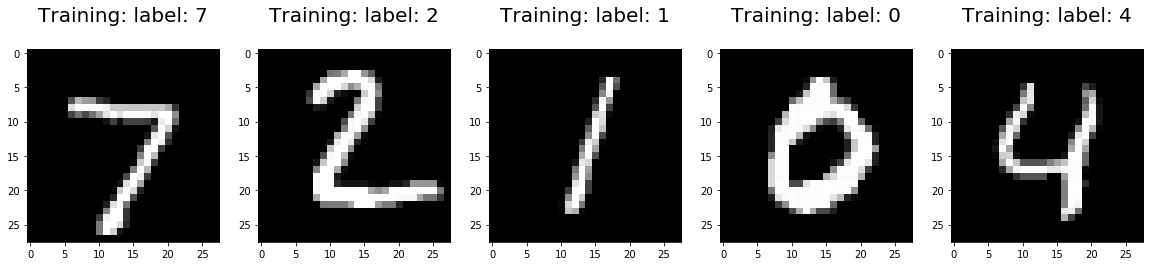

In [21]:
import matplotlib.pyplot as plt

def plt_mnist(x, y, plt_num=5):
  plt.figure(figsize=(20,4))
  for index, (image, label) in enumerate(zip(x[0:plt_num], y[0:plt_num])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('{}: label: {}\n'.format('Predict', label), fontsize = 20)


predict_ = trainer.model.predict(x_test)
predict = [tf.argmax(e).numpy() for e in predict_]
plot_mnist(x_test, predict)